In [3]:
import numpy as np


X = np.array([0, 1, 2, 3, 1, 1.5])
Y = np.array([1, 2, 1.5, 2, 1, 2])


A = np.vstack([
    [X.size, X.sum(), (X**2).sum()],
    [X.sum(), (X**2).sum(), (X**3).sum()],
    [(X**2).sum(), (X**3).sum(), (X**4).sum()]
])


B = np.array([
    Y.sum(),
    (X*Y).sum(),
    (X**2 * Y).sum()
])


alphas = np.linalg.solve(A, B)


Y_pred = alphas[0] + alphas[1]*X + alphas[2]*X**2


SSE = ((Y_pred - Y)**2).sum()

print("alpha_0:", alphas[0])
print("alpha_1:", alphas[1])
print("alpha_2:", alphas[2])
print("SSE:", SSE)


alpha_0: 1.028245614035088
alpha_1: 0.5805263157894734
alpha_2: -0.09298245614035087
SSE: 0.702719298245614


Cost function values for 3 iterations: [3.6738224386769986, 3.304935601670161, 2.9736681927851265]


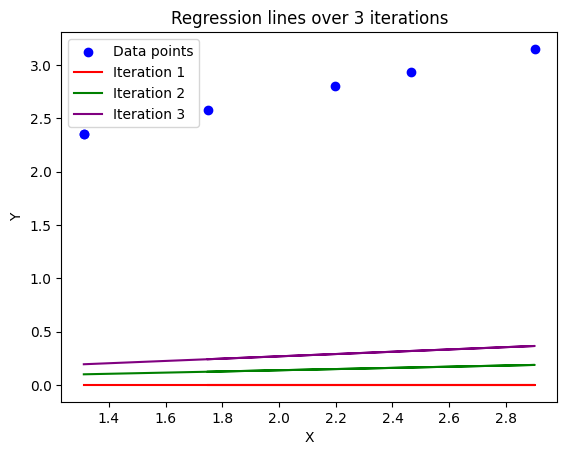

In [4]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42) 
X = np.random.uniform(1, 3, 6)
Y = 1.7 + 0.5*X


alpha0, alpha1 = 0, 0
learning_rate = 0.01
iterations = 3
m = len(X)


alpha0_values = [alpha0]
alpha1_values = [alpha1]
cost_values = []


for i in range(iterations):
    
    Y_pred = alpha0 + alpha1*X
    
    
    cost = (1/(2*m)) * np.sum((Y_pred - Y)**2)
    cost_values.append(cost)
    
    
    d_alpha0 = (1/m) * np.sum(Y_pred - Y)
    d_alpha1 = (1/m) * np.sum((Y_pred - Y) * X)
    
    
    alpha0 = alpha0 - learning_rate * d_alpha0
    alpha1 = alpha1 - learning_rate * d_alpha1
    
   
    alpha0_values.append(alpha0)
    alpha1_values.append(alpha1)


print("Cost function values for 3 iterations:", cost_values)


plt.scatter(X, Y, color='blue', label="Data points")
colors = ['red', 'green', 'purple']

for i in range(iterations):
    plt.plot(X, alpha0_values[i] + alpha1_values[i] * X, color=colors[i], label=f"Iteration {i+1}")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Regression lines over 3 iterations")
plt.show()
